<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

Download the webpage at the url


In [3]:
# Send an HTTP GET request to the URL
response = requests.get(url)

Create a soup object


In [4]:
# Create a Beautiful Soup object to parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [6]:
    # Find the table containing the programming language data
    table = soup.find('table')

    # Create lists to store language names and average annual salaries
    language_names = []
    avg_salaries = []

    # Loop through the table rows and extract data
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')
        language = columns[1].get_text(strip=True)  # Extract the language name
        salary = columns[3].get_text(strip=True)  # Extract the average annual salary
        language_names.append(language)
        avg_salaries.append(salary)

    # Create a DataFrame to store the scraped data
    data = {
        'Language': language_names,
        'Average Annual Salary': avg_salaries
    }
    df = pd.DataFrame(data)

Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# Save the DataFrame to a CSV file
df.to_csv('popular-languages.csv', index=False)

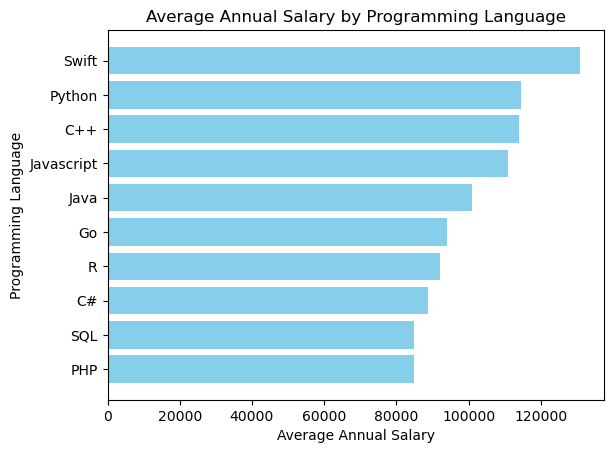

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the job postings data from the CSV file
df = pd.read_csv("popular-languages.csv")

# Convert the "Average Annual Salary" column to numeric (remove commas and dollar signs)
df["Average Annual Salary"] = df["Average Annual Salary"].str.replace(',', '').str.replace('$', '').astype(float)

# Sort the data in descending order of salary
sorted_df = df.sort_values(by="Average Annual Salary", ascending=False)

# Create a bar chart
plt.figure()
plt.barh(sorted_df["Language"], sorted_df["Average Annual Salary"], color='skyblue')
plt.xlabel("Average Annual Salary")
plt.ylabel("Programming Language")
plt.title("Average Annual Salary by Programming Language")
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest salary at the top

# Display the chart
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
